In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def plot_compare(*args):
    L = len(args)

    if (L == 0):
        return
    elif (L == 1):
        plt.imshow(args[0])
        plt.axis('off')
    else:
        f, axs = plt.subplots(1, L, figsize=(10,10*L))
        for i, ax in enumerate(axs):
            ax.imshow(args[i])
            ax.axis('off')
    plt.show()
        

In [3]:
def convolve_filter(channel, FILTER):
    N = len(FILTER)
    view_shape = tuple(np.subtract(channel.shape, (N,N)) + 1) + (N, N)
    strides = channel.strides + channel.strides
    sub_matrices = np.lib.stride_tricks.as_strided(channel,view_shape,strides)
    filtered = np.einsum('ij,klij',FILTER,sub_matrices)
    return np.clip(filtered, 0, 255).astype(np.uint8)

### Item 4

Um filtro passa-baixa bastante conhecido é o filtro Gaussiano. Através de uma máscara determinada por um desvio padrão σ, é possível fazer o que chamamos de suavização gaussiana de uma imagem. Considere o filtro 5x5 de desvio padrão unitário abaixo:

$g = \begin{bmatrix} 
1/273 &  4/273 &  7/273 &  4/273 &  1/273 \\
4/273 & 16/273 & 26/273 & 16/273 &  4/273 \\
7/273 & 26/273 & 41/273 & 26/273 &  7/273 \\
4/273 & 16/273 & 26/273 & 16/273 &  4/273 \\
1/273 &  4/273 &  7/273 &  4/273 &  1/273 \\
\end{bmatrix}$

Crie uma imagem I de dimensões 100 × 100 que contém um único valor não nulo localizado no centro da imagem.<br>Utilizando o filtro gaussiano acima, calcule e exiba I * g, onde ∗ é a notação para o operador de convolução.

#### Result

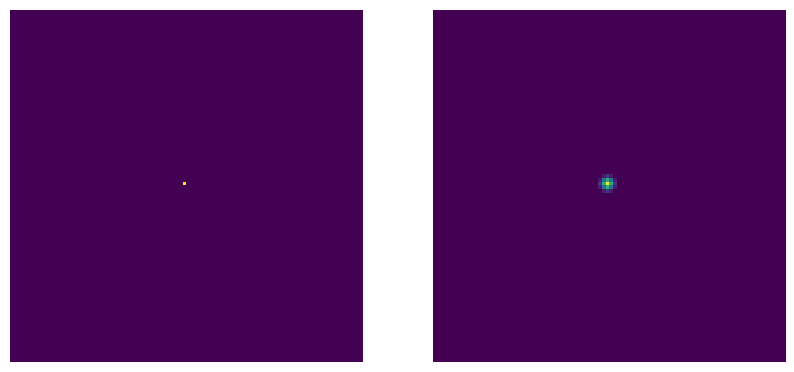

In [4]:
FILTER = np.array([[ 1,  4,  7,  4,  1],
                   [ 4, 16, 26, 16,  4],
                   [ 7, 26, 41, 26,  7],
                   [ 4, 16, 26, 16,  4],
                   [ 1,  4,  7,  4,  1]]) / 273

blank = np.zeros((100,100)).astype(np.uint8)
blank[49][49] = 255

result = convolve_filter(blank, FILTER)
plot_compare(blank, result)
